In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
from scipy.stats import zscore
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import train_test_split

In [2]:
data = pd.read_csv("winedataset.csv")

In [3]:
#data.dtypes

In [4]:
data_feature = data.drop(labels = "target", axis = 1)

In [16]:
data_feature.head()

,alcohol,malicacid,ash,alcofash,mg,tphenols,flav,nonflav,proantho,color,hue,dilutedwines,proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [6]:
#data_feature_z = data_feature.apply(zscore) 

In [7]:
standardizedData = StandardScaler().fit_transform(data_feature)
X = standardizedData
y = data.target

/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:617: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.7/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


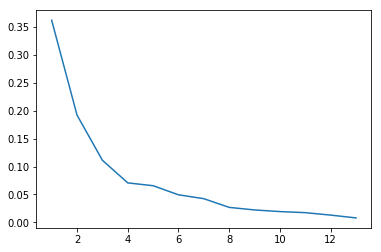

In [8]:
pca = PCA(n_components=13)
principalComponents = pca.fit_transform(X)
#pca.get_covariance()
#pca.explained_variance_
#pca.explained_variance_ratio_
#pca.explained_variance_ratio_.cumsum()
a=pca.explained_variance_ratio_
g=range(1,14)
plt.plot(g,a)
plt.show()

In [9]:
pca = PCA(.90)

principalComponents1 = pca.fit_transform(X)
# To get how many principal components was chosen
n_components = pca.n_components_
print("n_components = ",pca.n_components_)
pca = PCA(n_components)

principalComponents2 = pca.fit_transform(X)

# to get how much variance was retained
print(pca.explained_variance_ratio_.sum())

n_components =  8
0.9201754434577264


In [10]:
X_Train = X
X_Test = X
Y_Train = y
Y_Test= y
X_Train.shape, X_Test.shape, Y_Train.shape, Y_Test.shape

((178, 13), (178, 13), (178,), (178,))

In [11]:
DTClassifier = DecisionTreeClassifier (criterion='gini', max_depth=3, min_samples_split = 3)
DTClassifier.fit (X_Train,Y_Train)
predicted_labels = DTClassifier.predict(X_Test)
accuracyscore = accuracy_score(Y_Test, predicted_labels)
print("accuracy = ", accuracyscore*100.0)
print(confusion_matrix(Y_Test, predicted_labels))
print(classification_report(Y_Test, predicted_labels))

accuracy =  97.75280898876404
[[57  2  0]
 [ 0 70  1]
 [ 0  1 47]]
              precision    recall  f1-score   support

           1       1.00      0.97      0.98        59
           2       0.96      0.99      0.97        71
           3       0.98      0.98      0.98        48

   micro avg       0.98      0.98      0.98       178
   macro avg       0.98      0.98      0.98       178
weighted avg       0.98      0.98      0.98       178



In [12]:
DTClassifier = DecisionTreeClassifier (criterion='entropy', max_depth=3, min_samples_split = 3)
DTClassifier.fit (X_Train,Y_Train)
predicted_labels1 = DTClassifier.predict(X_Test)
accuracyscore1 = accuracy_score(Y_Test, predicted_labels1)
print("accuracy = ", accuracyscore1*100.0)
print(confusion_matrix(Y_Test, predicted_labels1))
print(classification_report(Y_Test, predicted_labels1))

accuracy =  99.43820224719101
[[58  1  0]
 [ 0 71  0]
 [ 0  0 48]]
              precision    recall  f1-score   support

           1       1.00      0.98      0.99        59
           2       0.99      1.00      0.99        71
           3       1.00      1.00      1.00        48

   micro avg       0.99      0.99      0.99       178
   macro avg       1.00      0.99      0.99       178
weighted avg       0.99      0.99      0.99       178



In [13]:
#principalComponents
X_Train1 = principalComponents2
X_Test1 = principalComponents2
Y_Train1 = y 
Y_Test1= y
X_Train1.shape, X_Test1.shape, Y_Train1.shape, Y_Test1.shape

((178, 8), (178, 8), (178,), (178,))

In [14]:
DTClassifier = DecisionTreeClassifier (criterion='gini', max_depth=3, min_samples_split = 3)
DTClassifier.fit (X_Train1,Y_Train1)
predicted_labels2 = DTClassifier.predict(X_Test1)
accuracyscore2 = accuracy_score(Y_Test1, predicted_labels2)
print("accuracy = ", accuracyscore2*100.0)
print(confusion_matrix(Y_Test1, predicted_labels2))
print(classification_report(Y_Test1, predicted_labels2))

accuracy =  98.87640449438202
[[59  0  0]
 [ 2 69  0]
 [ 0  0 48]]
              precision    recall  f1-score   support

           1       0.97      1.00      0.98        59
           2       1.00      0.97      0.99        71
           3       1.00      1.00      1.00        48

   micro avg       0.99      0.99      0.99       178
   macro avg       0.99      0.99      0.99       178
weighted avg       0.99      0.99      0.99       178



In [15]:
DTClassifier = DecisionTreeClassifier (criterion='entropy', max_depth=3, min_samples_split = 3)
DTClassifier.fit (X_Train1,Y_Train1)
predicted_labels3 = DTClassifier.predict(X_Test1)
accuracyscore3 = accuracy_score(Y_Test1, predicted_labels3)
print("accuracy = ", accuracyscore3*100.0)
print(confusion_matrix(Y_Test1, predicted_labels3))
print(classification_report(Y_Test1, predicted_labels3))

accuracy =  98.87640449438202
[[59  0  0]
 [ 2 69  0]
 [ 0  0 48]]
              precision    recall  f1-score   support

           1       0.97      1.00      0.98        59
           2       1.00      0.97      0.99        71
           3       1.00      1.00      1.00        48

   micro avg       0.99      0.99      0.99       178
   macro avg       0.99      0.99      0.99       178
weighted avg       0.99      0.99      0.99       178

